# Exploratory Data Analysis

## Preface 
Seluruh anggota dalam kelompok 11:
- Adi Satria Pangesetu  5027231043
- Muhamad Rizq Taufan   5027231021
- Thio Billy Amanysah   5027231007

**Nama Dataset :** House Price Prediciton Data

**Deskripsi :** Predict house prices with a rich dataset - perfect for data enthusiasts and Kaggle users!

**Daftar Atribut**

| Atribut | Deskripsi|
|:---|:---|
| SquareFeet | variable that messure the house's area |
| Bedrooms | a numeric amount of bedrooms inside house |
| Bathrooms | a numeric amount of bathrooms inside house |
| Neighborhood | attribute in which describe what category of neighberhood the house reside in |
| YearBuilt | a numeric variable that shows the year the house was built |
| Price | a numeric value of the house. |

* **Jumlah kolom :** 6
* **Jumlah baris :** 50.000

* **Sumber :** https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data/

## Tujuan Analisis

Mencari atribut atau variabel apa saja yang mempengaruhi harga perumahan.

## 1.  Memahami Dataset

### a. Memuat Dataset

Dataset berbentuk CSV, diimport menggunakan library Pandas dengan bahasa pemrograman Python.

In [4]:
# import library 
import pandas as pd

# load dataset 
df = pd.read_csv('hpd.csv')

### b. Menampilkan Dataset

Melihat beberapa baris data untuk memahami struktur dan formatnya secara sekilas.

In [5]:
# Format to max two digit after decimal value
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# menampilkan dataset
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.28
1,2459,3,2,Rural,1980,195014.22
2,1860,2,1,Suburb,1970,306891.01
3,2294,2,1,Urban,1996,206786.79
4,2130,5,2,Suburb,2001,272436.24
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.87
49996,2854,2,2,Suburb,1988,374507.66
49997,2979,5,3,Suburb,1962,384110.56
49998,2596,5,2,Rural,1984,380512.69


Terlihat bahwa dataset memang terdiri dari **2.938 baris** dan **22 kolom**.

### c. Mengidentifikasi Atribut 

Mengidentifikasi jenis-jenis atribut pada data, tipe data setiap atribut, dan arti dari setiap atribut.

In [6]:
# list nama atribut
df.columns.values.tolist()

['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt', 'Price']

In [20]:
# identifikasi tipe data setiap atribut
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

Berikut adalah deskripsi atribut/kolom yang kami:


| Atribut | Deskripsi|
|:---|:---|
| SquareFeet | Square Feet of the house |
| Bedrooms | amt of bedrooms |
| Bathrooms | amt of bathrooms/restroom/washroom |
| Neighborhood | area neighborhood where the house is |
| YearBuilt | which year it was built |
| Price | the price of the home |

Terdapat beberapa atribut yang mungkin saja dapat mempengaruhi volume lalu lintas jalan, yaitu:
* Hari libur nasional
* Suhu
* Hujan
* Salju
* Presentase berawan
* Cuaca
* Waktu

Kita harus mengidentifikasi atribut satu per-satu.

### 1) Hari Libur Nasional

Atribut "holiday" berisi data dengan tipe data **object** atau **string** atau karakter. Sehingga, kita identifikasi lihat nilai apa saja sih yang dimiliki oleh atribut ini.

In [27]:
# cek semua nilai yang berbeda dalam kolom "holiday"
df['SquareFeet'].unique().tolist()

[2126,
 2459,
 1860,
 2294,
 2130,
 2095,
 2724,
 2044,
 2638,
 1121,
 1466,
 2238,
 1330,
 2482,
 1087,
 2396,
 2123,
 1871,
 2687,
 1130,
 2685,
 2332,
 1769,
 1343,
 2515,
 2437,
 1805,
 1385,
 2215,
 1955,
 1276,
 2184,
 1459,
 2337,
 1021,
 1252,
 1747,
 1856,
 2584,
 1474,
 2082,
 1510,
 2705,
 2499,
 1699,
 1975,
 2806,
 1189,
 1957,
 1686,
 1562,
 2899,
 2590,
 2267,
 1831,
 2528,
 2154,
 2508,
 2842,
 1646,
 1020,
 1840,
 1166,
 2297,
 1387,
 1600,
 1315,
 1013,
 1241,
 1776,
 2369,
 1564,
 1897,
 2363,
 1091,
 2390,
 2478,
 2451,
 1508,
 1775,
 2966,
 1034,
 1205,
 2104,
 2955,
 2585,
 2895,
 2411,
 2025,
 2021,
 2413,
 1565,
 2129,
 2795,
 2845,
 2500,
 1702,
 1401,
 1729,
 2579,
 1161,
 1201,
 2981,
 1995,
 1269,
 2886,
 1815,
 1455,
 2485,
 2750,
 2275,
 2016,
 2725,
 1295,
 2748,
 1719,
 2772,
 1337,
 1878,
 2076,
 1791,
 2945,
 1216,
 1763,
 1187,
 1379,
 1492,
 2064,
 2180,
 1014,
 2836,
 1064,
 2880,
 2862,
 1520,
 2367,
 2152,
 1647,
 2495,
 2086,
 2162,
 2522,
 1592,

Ternyata, ada nilai "None" pada atribut "holiday", yang artinya "tidak ada hari libur" atau "hari kerja". Untuk ke depannya kita perlu melakukan pre-processing pada atribut ini. 

### 2) Suhu, Hujan, Salju

Atribut "temp", "rain", dan "snow" berisi data dengan tipe data **float** atau bilangan pecahan. Kita tidak perlu mengetahui nilai distinct-nya karena hasilnya pasti banyak sekali. Kita hanya perlu mencari apakah atribut ini memiliki nilai yang "aneh".

In [ ]:
# cek apakah ada nilai null
traffic_df['temp'].isnull().values.any()

False

In [ ]:
# cek apakah ada nilai null
traffic_df['rain_1h'].isnull().values.any()

False

In [ ]:
# cek apakah ada nilai null
traffic_df['snow_1h'].isnull().values.any()

False

Tidak ada nilai "null", artinya atribut-atribut ini cukup baik, tidak perlu melalui pre-processing.

### 3) Presentase Berawan

Atribut "clouds" berisi data dengan tipe data **int** atau bilangan bulat. Kita tidak perlu mengetahui nilai distinct-nya karena hasilnya pasti banyak sekali. Kita hanya perlu mencari apakah atribut ini memiliki nilai yang "aneh".

In [ ]:
# cek apakah ada nilai null
df['clouds_all'].isnull().values.any()

False

Tidak ada nilai "null", artinya atribut ini cukup baik, tidak perlu melalui pre-processing.

### 4) Cuaca

Atribut "weather" berisi data dengan tipe data **object** atau **string** atau karakter. Atribut ini terdiri dari 2 kolom, yaitu "weather_main" dan "weather_description" yang sepertinya saling berhubungan. Kita harus cek lagi.

In [ ]:
# cek semua nilai yang berbeda dalam kolom "weather_main"
traffic_df['weather_main'].unique().tolist()

['Clouds',
 'Clear',
 'Rain',
 'Drizzle',
 'Mist',
 'Haze',
 'Fog',
 'Thunderstorm',
 'Snow',
 'Squall',
 'Smoke']

In [ ]:
# cek semua nilai yang berbeda dalam kolom "weather_description"
traffic_df['weather_description'].unique().tolist()

['scattered clouds',
 'broken clouds',
 'overcast clouds',
 'sky is clear',
 'few clouds',
 'light rain',
 'light intensity drizzle',
 'mist',
 'haze',
 'fog',
 'proximity shower rain',
 'drizzle',
 'moderate rain',
 'heavy intensity rain',
 'proximity thunderstorm',
 'thunderstorm with light rain',
 'proximity thunderstorm with rain',
 'heavy snow',
 'heavy intensity drizzle',
 'snow',
 'thunderstorm with heavy rain',
 'freezing rain',
 'shower snow',
 'light rain and snow',
 'light intensity shower rain',
 'SQUALLS',
 'thunderstorm with rain',
 'proximity thunderstorm with drizzle',
 'thunderstorm',
 'Sky is Clear',
 'very heavy rain',
 'thunderstorm with light drizzle',
 'light snow',
 'thunderstorm with drizzle',
 'smoke',
 'shower drizzle',
 'light shower snow',
 'sleet']

In [29]:
import pprint

# function to get unique values
def unique(mylist):
    unique_list = []
    for x in mylist:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)

    pprint.pprint(unique_list)

In [30]:
# cek semua pasangan yang berbeda pada kolom "weather_main" dan "weather_description"
unique(list(zip(df['YearBuilt'],df['Price'])))

[(1969, 215355.28361820136),
 (1980, 195014.22162584803),
 (1970, 306891.0120763329),
 (1996, 206786.78715332696),
 (2001, 272436.239065061),
 (2020, 198208.80390657103),
 (1993, 343429.3191099182),
 (1957, 184992.321268412),
 (1959, 377998.58815204125),
 (2004, 95961.92601406392),
 (1951, 191113.7686788604),
 (1987, 253358.64500167352),
 (1992, 132172.3926169813),
 (1989, 231157.02767588635),
 (1976, 118393.82316264397),
 (1993, 267377.3996858498),
 (1956, 190773.14856300573),
 (1977, 172989.80490101498),
 (1979, 239222.6677969504),
 (1962, 143050.20178240183),
 (1999, 405523.82831733953),
 (1978, 263954.1540627713),
 (1963, 148310.62016790514),
 (2013, 151733.92248999208),
 (2013, 307961.1073823952),
 (2004, 276162.86180465267),
 (2002, 243985.2054715822),
 (1996, 88030.54185271678),
 (1952, 282908.98169371625),
 (2014, 240976.55176671065),
 (1965, 104747.33458904953),
 (1959, 347207.38956128363),
 (2006, 77493.9314389322),
 (2008, 331851.0816694101),
 (2013, 110408.67080143408),
 (1

Tidak ada nilai "null" atau "None", artinya 2 atribut ini cukup baik, tidak perlu melalui pre-processing.

### 5) Waktu

Atribut "date_time" berisi data dengan tipe data **object** atau **string** atau karakter. 

In [ ]:
# cek apakah ada nilai null
traffic_df['date_time'].isnull().values.any()

False

Tidak ada "null" pada atribut ini, namun atribut ini tidak berarti apa-apa jika masih dalam bentuk tipe data object. Diperlukan pre-processing untuk mengolah dan menggunakan atribut ini lebih jauh.

## 2. Statistik Deskriptif

Statistik deskriptif ada 2, untuk melihat pemusatan data dan penyebaran data.
* **Pemusatan data**: Mean, median, modus
* **Penyebaran data**: Varian, standar deviasi

Kita bisa menggunakan fungsi yang telah disediakan Pandas yaitu **describe()** untuk mendapatkan nilai mean, std, max, min, dan kuartil secara cepat.

In [2]:
df.describe()

NameError: name 'df' is not defined

Membuat code Python ([statistics_descriptive.py](statistics_descriptive.py)) untuk menampilkan histogram data dari masing-masing atribut. 

In [32]:
# import dari py yang kita bikin sendiri (harus satu direktori)
import statistics_descriptive as sd

### 1) Volume Lalu Lintas

Mean: 224827.3251509865


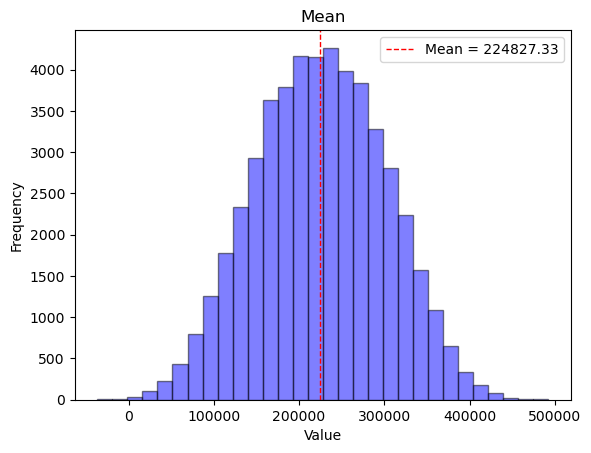

In [33]:
sd.visualize_mean(df['Price'])

Median: 3380.0


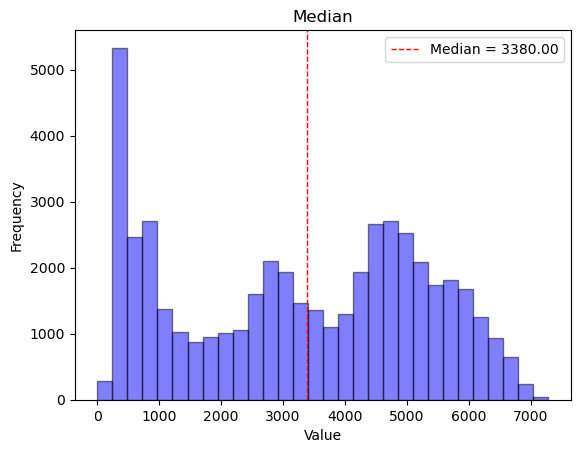

In [ ]:
sd.visualize_median(traffic_df['traffic_volume'])

Modus: [353, 356]


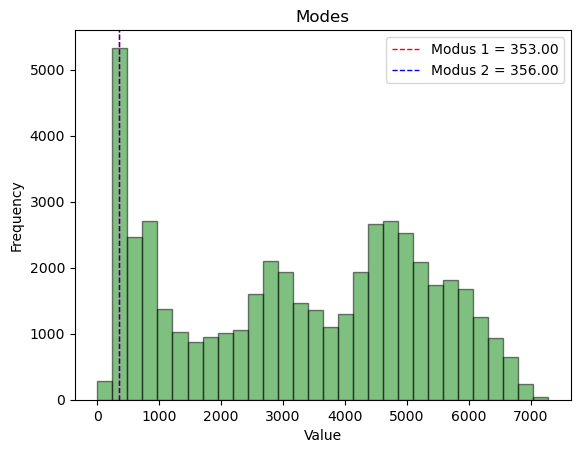

In [ ]:
sd.visualize_modus(traffic_df['traffic_volume'])

Mean dan mediannya hampir sama, yaitu 3259.8 dan 3380, artinya distribusi data simetris dan tidak terpengaruh oleh outliers. Sedangkan modusnya adalah 353 dan 356, dimana jauh dari mean dan median, artinya distribusi data tidak normal dan bimodal (karena ada dua mouds, meskipun hampir sama).

Range: 7280 - 0 = 7280


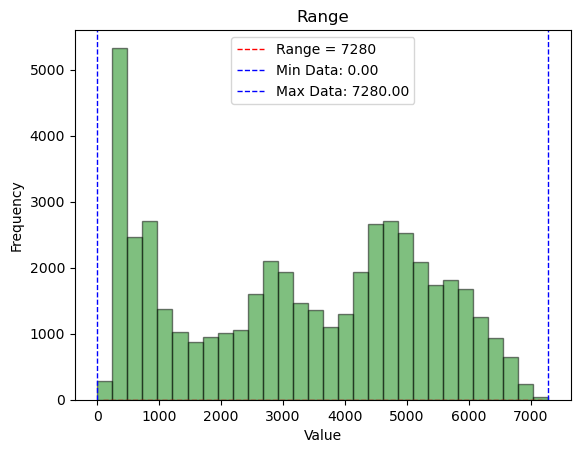

In [ ]:
sd.visualize_range(traffic_df['traffic_volume'])

Mean: 3259.8183553232097
Mean: 3259.8183553232097
Variansi: 190286901451.51852 / 48204 = 3947533.429829859
Standard Deviation: 3947533.429829859**0.5 = 1986.8400614618831


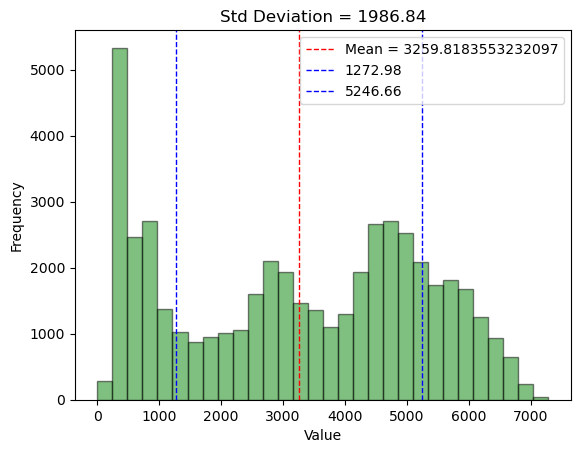

In [ ]:
sd.visualize_std(traffic_df['traffic_volume'])

In [ ]:
# Convert datetime menjadi tipe data pandas datetime
df['date_time'] = pandas.to_datetime(traffic_volume_dataset['date_time'])

NameError: name 'pandas' is not defined

In [ ]:
traffic_df.describe()

In [ ]:
traffic_volume_dataset

In [ ]:
# Extract additional time-based columns for analysis
traffic_volume_dataset['hour'] = traffic_volume_dataset['date_time'].dt.hour
traffic_volume_dataset['day'] = traffic_volume_dataset['date_time'].dt.day
traffic_volume_dataset['month'] = traffic_volume_dataset['date_time'].dt.month
traffic_volume_dataset['year'] = traffic_volume_dataset['date_time'].dt.year

In [ ]:
traffic_volume_dataset

In [ ]:
# cek tipedata setiap kolom
traffic_volume_dataset.dtypes